In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
from fibonacci import generate_vertices, generate_vertices_angles
from commutators import test_angular_momentum_comutator, fourier_vector, calc_r
from lattice_actions import calc_mean_distance
from lattice_optimisation import lattice_optimizer, angles_to_cartesian
from linear_discetisation import Linear_disc_points

In [2]:
N = np.array([2**i for i in range(3,7)])
#Lattices = [generate_vertices(i) for i in N]
Lattices = [angles_to_cartesian(lattice_optimizer(generate_vertices_angles(i), eps=1e-12)[0]) for i in N]

mean_distances= []
rs = []
k = np.array([0,0,0,0])
a = 3
n = 1
i,j = 0, 0
for vertex in Lattices:
    vec = fourier_vector(vertex, a, k)
    comm = test_angular_momentum_comutator(vertex, a, n=n, i=i,j=j)
    rs.append(calc_r(comm, vec=vec))
    mean_distances.append(calc_mean_distance(vertex))

In [7]:
N = np.array([6,7,8,9,10,11,12,13])
#Lattices = [generate_vertices_angles(i) for i in N]
Lattices = [Linear_disc_points(i) for i in N]
mean_distances= []
rs = []
k = np.array([0,0,0,0])
a = 1
n = 1
i,j = 0, 0
for vertex in Lattices:
    print(vertex.shape)
    vec = fourier_vector(vertex, a, k)
    comm = test_angular_momentum_comutator(vertex, a, n=n, i=i,j=j)
    rs.append(calc_r(comm, vec=vec))
    #mean_distances.append(calc_mean_distance(vertex))

(160, 4)
linear dep [[ 0.          0.         -0.62083588]
 [-0.37613734  0.37613734  0.20694529]
 [ 0.75227469 -0.75227469  0.62083588]] 
 (matrix([[ 0.24006683,  0.76500004, -0.5976143 ],
        [ 0.26665208, -0.64390291, -0.71713717],
        [-0.93341555,  0.01280574, -0.35856858]]), array([1.31960880e+00, 6.97944396e-01, 3.78426425e-17]), matrix([[-6.08121664e-01,  6.08121664e-01, -5.10270599e-01],
        [ 3.60815801e-01, -3.60815801e-01, -8.60013904e-01],
        [ 7.07106781e-01,  7.07106781e-01,  5.55111512e-17]])) 
 (array([ 4.98486613e-01+0.77958289j,  4.98486613e-01-0.77958289j,
       -7.85804423e-17+0.j        ]), matrix([[-2.76273905e-01+0.43206458j, -2.76273905e-01-0.43206458j,
          7.07106781e-01+0.j        ],
        [-1.51957289e-01-0.36005382j, -1.51957289e-01+0.36005382j,
          7.07106781e-01+0.j        ],
        [ 7.64371087e-01+0.j        ,  7.64371087e-01-0.j        ,
          5.16070342e-17+0.j        ]])) 


linear dep [[ 3.76137344e-01 -3.7613734

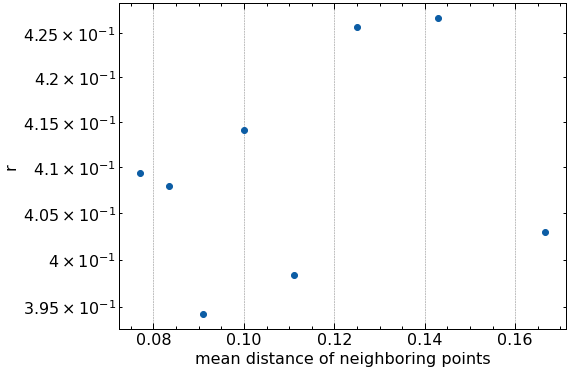

In [8]:
plt.plot(1/N, rs, "o")
plt.xlabel("mean distance of neighboring points")
plt.ylabel("r")
plt.yscale("log")
plt.show()

In [9]:
N = np.array([2**i for i in range(3,10)])
Lattices = [generate_vertices(i) for i in N]
#Lattices = [angles_to_cartesian(lattice_optimizer(generate_vertices_angles(i), eps=1e-12)[0]) for i in N]

mean_distances= []
rs = []
k = np.array([0,0,0,0])
a = 3
n = 1
i,j = 0, 0
for vertex in Lattices:
    vec = fourier_vector(vertex, a, k)
    comm = test_angular_momentum_comutator(vertex, a, n=n, i=i,j=j)
    rs.append(calc_r(comm, vec=vec))
    mean_distances.append(calc_mean_distance(vertex))

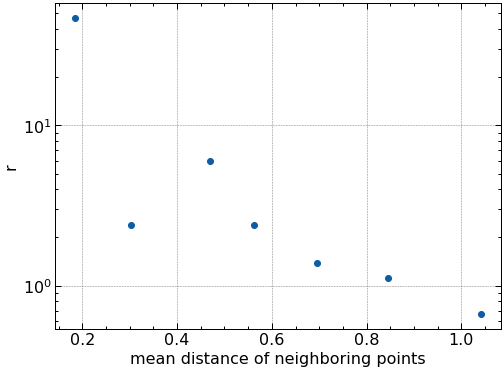

In [10]:
plt.plot(mean_distances, rs, "o")
plt.xlabel("mean distance of neighboring points")
plt.ylabel("r")
plt.yscale("log")
plt.show()

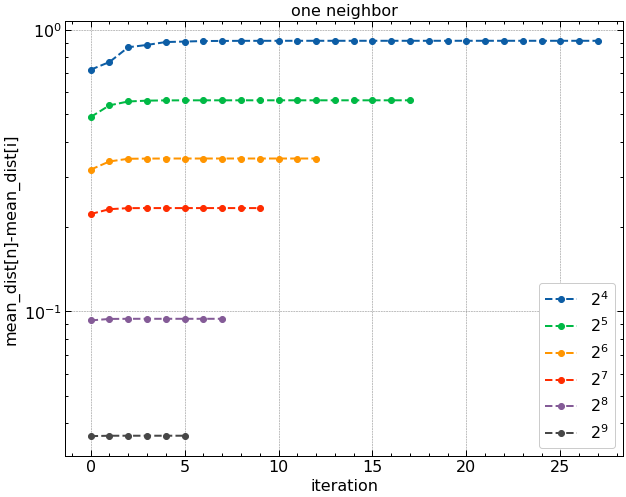

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=1)

    plt.plot(arr,"o--", label=rf"$2^{exp}$")


plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("one neighbor")
plt.yscale("log")
plt.show()

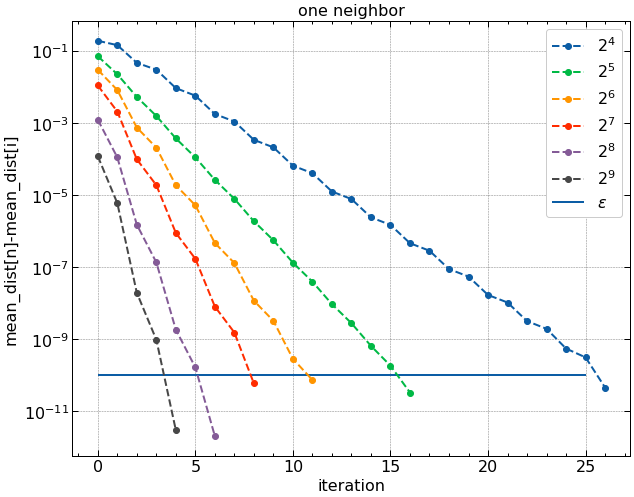

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=1)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("one neighbor")
plt.yscale("log")
plt.show()

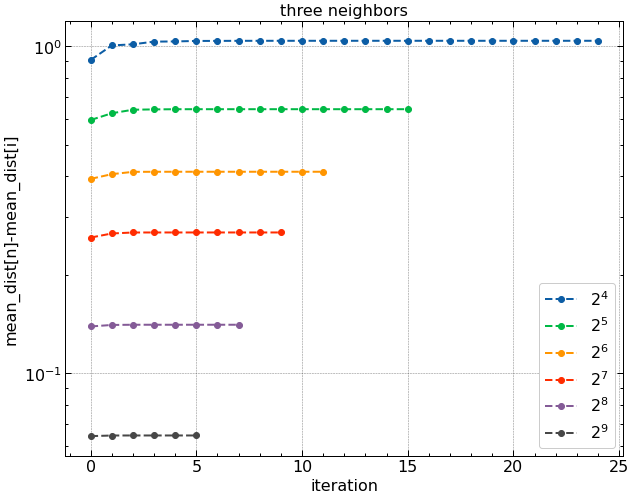

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=3)
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("three neighbors")
plt.yscale("log")
plt.show()

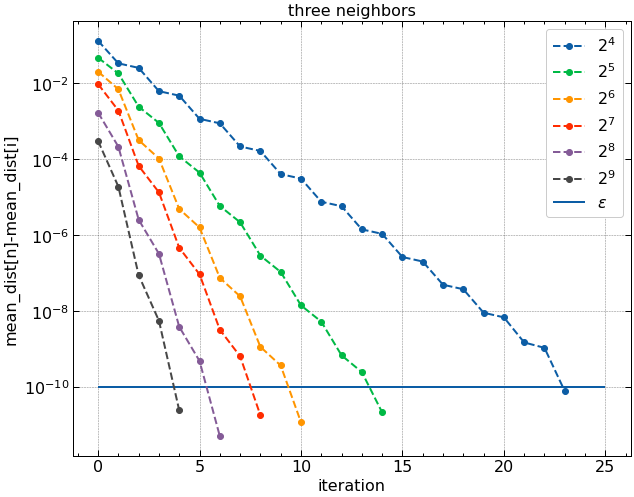

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=3)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("three neighbors")
plt.yscale("log")
plt.show()

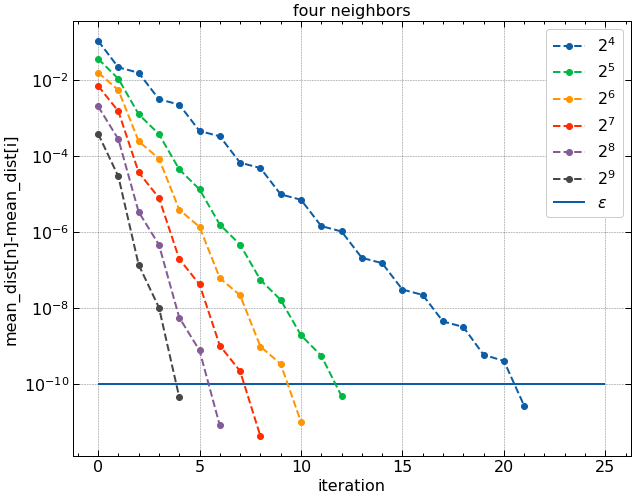

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(4,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=4)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("four neighbors")
plt.yscale("log")
plt.show()

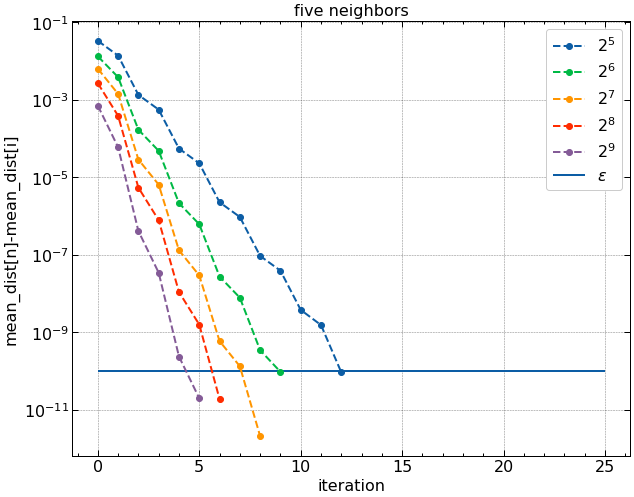

In [ ]:
from lattice_optimisation import lattice_optimizer
from fibonacci import generate_vertices_angles

N = np.array([i for i in range(5,10)])
eps = 1e-10
plt.figure(figsize=(10,8))
for exp in N:
    angles = generate_vertices_angles(2**exp)
    _,mean,arr = lattice_optimizer(angles, eps=eps, neighbors=5)
    arr = (mean-arr)[:-1]
    plt.plot(arr,"o--", label=rf"$2^{exp}$")

plt.hlines(eps, 0,25, label=rf"$\epsilon$")
plt.xlabel("iteration")
plt.ylabel("mean_dist[n]-mean_dist[i]")
plt.legend(loc="best")
plt.title("five neighbors")
plt.yscale("log")
plt.show()

In [7]:
def P_ref(beta):
    ''' 
    generates P_ref according to the strong and weak coupling expansion
    '''
    P = 0
    if beta < 1.21:
        koeffs = [1/4, -1/96, 7/1536, -31/23040, 4451/8847360, 
                    -264883/1486356480, 403651/5945425920,
                    -1826017873/68491306598400]
        for i in range(0,8):
            P += koeffs[i]*beta**(2*i-1)
    else:
        koeffs = [0.7498,0.1511,0.1427,0.1747,0.2435,0.368,0.5884,
                    0.98,1.6839,2.9652,5.326,9.7234,17.995,33.690,63.702]
        for i in range(1,16):
            P += koeffs[i-1]/beta**i
    return P

In [8]:
import pathlib 

betas = np.linspace(0.1,10,20)
P_r = [P_ref(beta) for beta in betas]



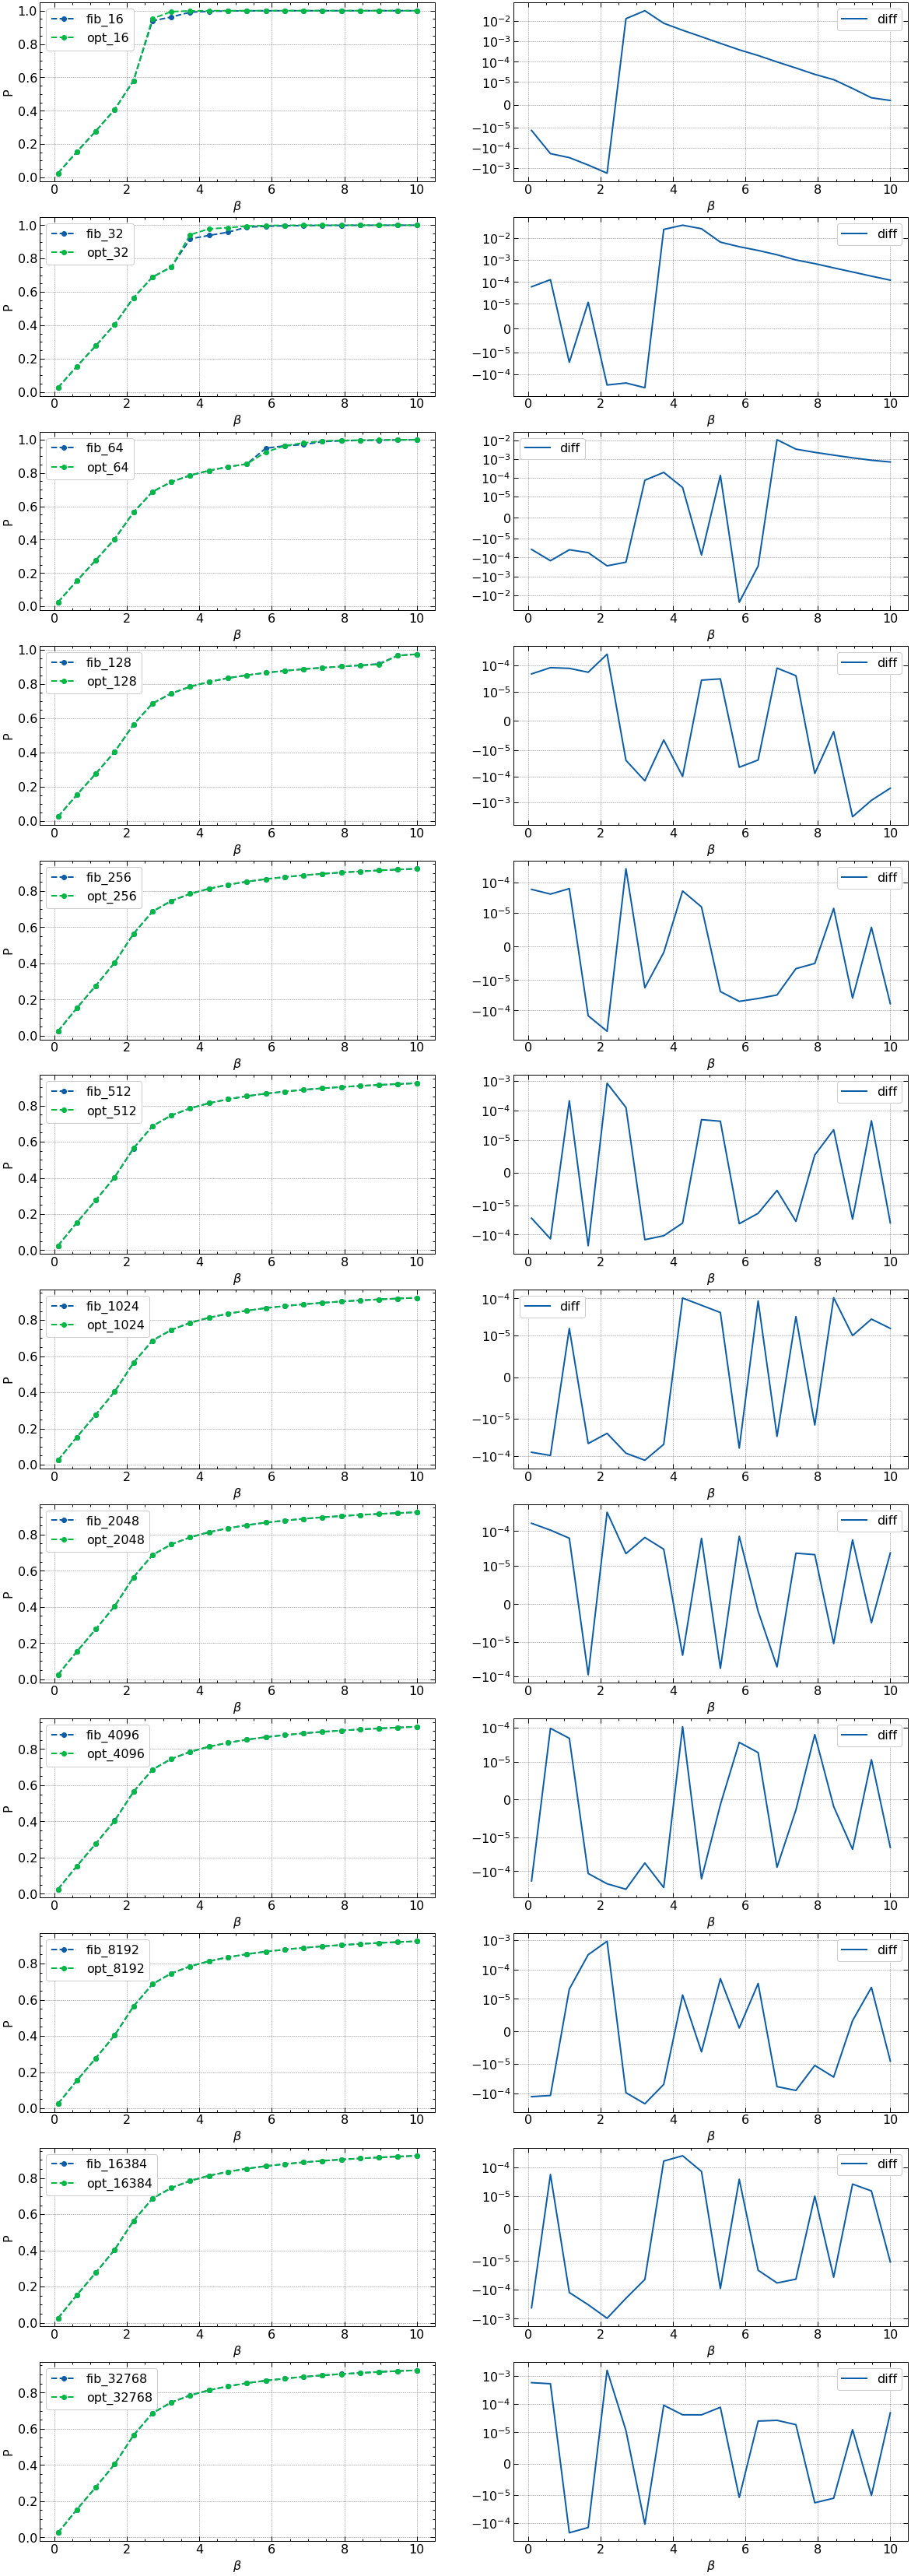

In [55]:
path = pathlib.Path("su2mc_cpp/tmp_7000sweeps_5000thrown")

#np.loadtxt("fib_16.csv")
fig, axes = plt.subplots(12,2,figsize=(20,60))
for i in range(4,16):
    ax1 = axes[i-4][0]
    ax2 = axes[i-4][1]
    fib = np.loadtxt(list(path.glob(f"**/fib*{2**i}.csv"))[0], usecols=(1))
    fib_sig = np.loadtxt(list(path.glob(f"**/fib*{2**i}.csv"))[0], usecols=(2))
    opt = np.loadtxt(list(path.glob(f"**/opt*{2**i}.csv"))[0], usecols=(1))
    opt_sig = np.loadtxt(list(path.glob(f"**/opt*{2**i}.csv"))[0], usecols=(2))
    
    ax1.plot(betas, fib, "o--", label=f"fib_{2**i}")
    ax1.plot(betas, opt, "o--", label=f"opt_{2**i}")
    ax2.plot(betas, (opt-fib), label="diff")
    ax2.set_yscale("symlog", linthresh=1e-5)
    ax1.legend(loc="best")
    ax2.legend(loc="best")
    ax1.set_xlabel(r"$\beta$")
    ax1.set_ylabel(r"P")
    ax2.set_xlabel(r"$\beta$")
plt.show()